## Appendix B

In [ ]:
!pip3 install numpy opencv-python matplotlib scikit-learn

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


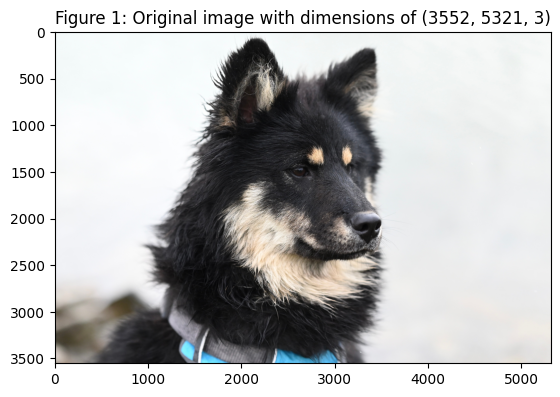

In [ ]:
# Load the original image in RGB format
img_path = '../assets/dog.jpg'
org_img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

plt.title(f'Figure 1: Original image with dimensions of {org_img.shape}')
plt.imshow(org_img)


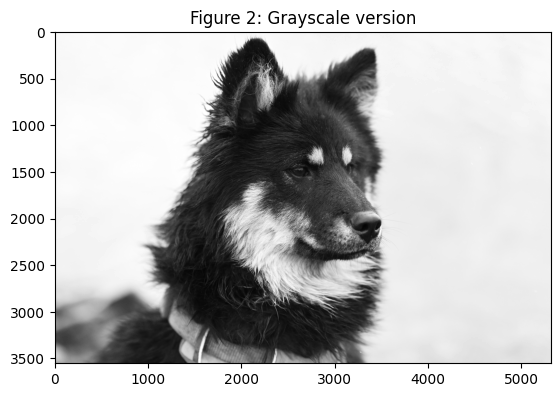

In [6]:
# in the following we are doing the following steps to achieve compression:
#==1==converting the entire image to grayscale,
#==2==applying PCA for dimensionality reduction,
#==2==and then mapping it back to grayscale.

# Convert the image to grayscale
gray_img = cv2.cvtColor(org_img, cv2.COLOR_RGB2GRAY)


plt.title('Figure 2: Grayscale version')
plt.imshow(gray_img, cmap='gray')

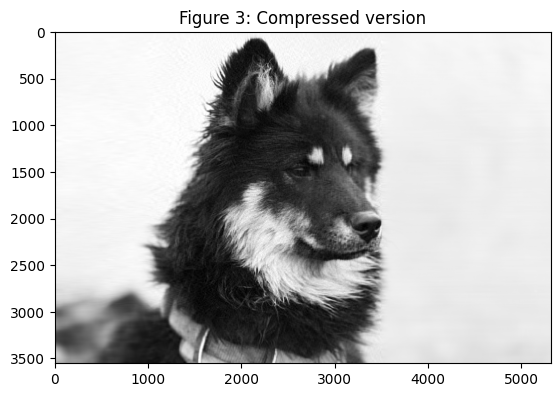

In [8]:
# Set the number of principal components for PCA
num_pc = 100  # Adjust based on testing to balance quality and compression

# Apply PCA to the grayscale image
pca = PCA(n_components=num_pc)
gray_reduced = pca.fit_transform(gray_img)
gray_reconstructed = pca.inverse_transform(gray_reduced)

# Clip values to ensure they are within the valid range
gray_reconstructed = np.clip(gray_reconstructed, 0, 255).astype(np.uint8)

# Convert the grayscale image back to RGB format for saving
comp_img_rgb = cv2.cvtColor(gray_reconstructed, cv2.COLOR_GRAY2RGB)

plt.title('Figure 3: Compressed version')
plt.imshow(comp_img_rgb, cmap='gray')


In [9]:
# Define the save path
save_path = '../processed_images/dog_compressed_grayscale.jpg'

# Save the compressed image with moderate JPEG quality
cv2.imwrite(save_path, comp_img_rgb, [int(cv2.IMWRITE_JPEG_QUALITY), 60])

# Display sizes to compare
original_size = os.path.getsize(img_path) / 1024  # Original size in KB
compressed_size = os.path.getsize(save_path) / 1024  # Compressed size in KB
print(f"Original Size: {original_size:.2f} KB")
print(f"Compressed Size: {compressed_size:.2f} KB")
print(f"Size is reduced by: {(100-(compressed_size*100)/original_size):.2f}%")

Original Size: 1183.70 KB
Compressed Size: 661.93 KB
Size is reduced by: 44.08%
